#### Install Numpy And Pandas

In [2]:
import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as plt

#### Load CSV menjadi dataframe dengan menggunakan pandas

In [3]:
#load csv dengan menggunakan pandas
londonDataFrame = pandas.read_csv('dataset/london_crime_by_lsoa.csv')

In [4]:
#set variable yang dibutuhkan
years = londonDataFrame.groupby("year").count().index #ini untuk list tahun yang ada pada dataframe
months = londonDataFrame.groupby("month").count().index #ini untuk list bulan yang ada pada dataframe
boroughs = londonDataFrame.groupby("borough").count().index #ini untuk list data Borough yang ada pada dataframe
major_categories = londonDataFrame.groupby("major_category").count().index #ini untuk list data major category yang ada pada dataframe
minor_categories = londonDataFrame.groupby("minor_category").count().index #ini untuk list data minor category yang ada pada dataframe

<AxesSubplot:title={'center':'Total Case per Year'}, xlabel='Year', ylabel='total Crime'>

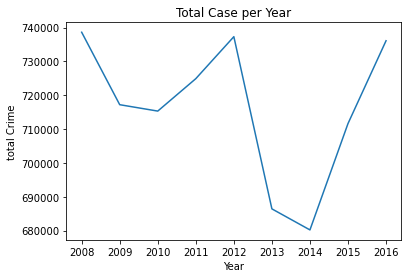

In [5]:
#Mendapatkan Rata rata kasus tiap tahun selama tahun 2008 - 2016
df_TotalCasePerYear = londonDataFrame.groupby("year")["value"].sum() #total Case Series from 2008 - 2016
meanCaseperYear = londonDataFrame.groupby("year")["value"].sum().mean(axis=0) #716417.5
mean_series = pandas.Series(716417.5, index=df_TotalCasePerYear.index)
df_TotalCasePerYear.plot(kind="line", title="Total Case per Year", xlabel="Year", ylabel="total Crime")
# mean_series.plot(kind="line")


In [6]:
londonDataFrame.groupby("borough")["value"].sum()

borough
Barking and Dagenham      149447
Barnet                    212191
Bexley                    114136
Brent                     227551
Bromley                   184349
Camden                    275147
City of London               780
Croydon                   260294
Ealing                    251562
Enfield                   193880
Greenwich                 181568
Hackney                   217119
Hammersmith and Fulham    185259
Haringey                  213272
Harrow                    116848
Havering                  138947
Hillingdon                209680
Hounslow                  186772
Islington                 230286
Kensington and Chelsea    171981
Kingston upon Thames       89306
Lambeth                   292178
Lewisham                  215137
Merton                    115654
Newham                    262024
Redbridge                 183562
Richmond upon Thames       96771
Southwark                 278809
Sutton                    100987
Tower Hamlets             228613
Wa

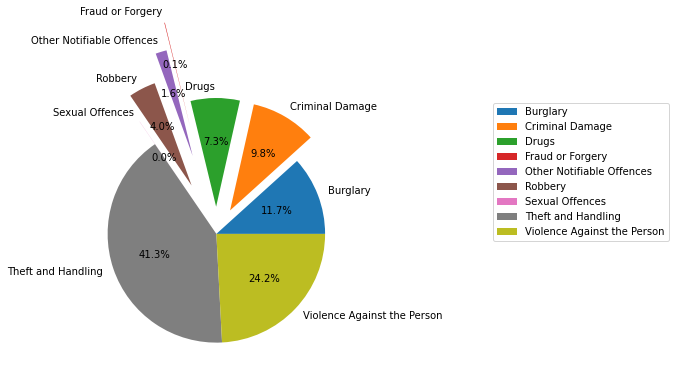

In [7]:
#get each minor by Major Category
majorGroup = londonDataFrame.groupby(["major_category"])["value"].sum()
majorGroup.plot(kind="pie", autopct="%.1f%%", explode=[0,0.25,0.25,1,0.75,0.5,0.25,0,0] ,legend=True, ylabel="", rot=30, figsize=(20,5))
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

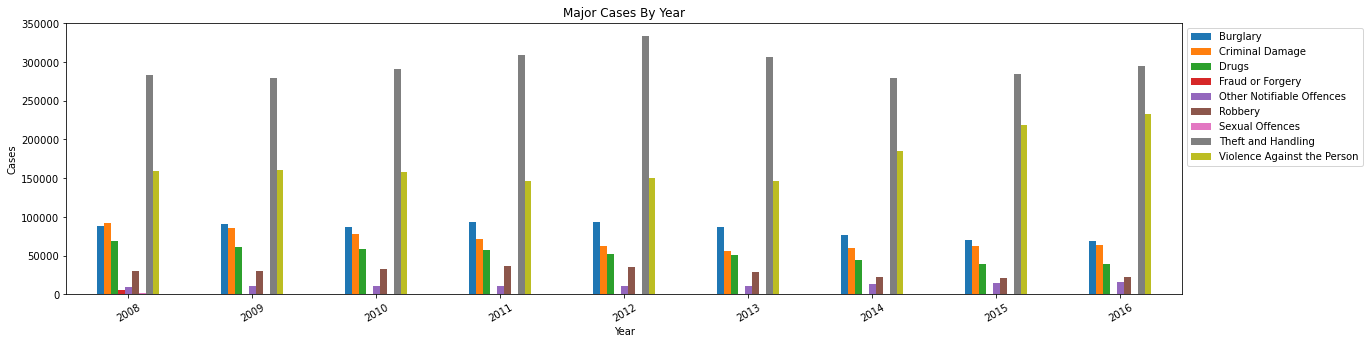

In [8]:
#membuat dataframe untuk mengetahui perkembangan tahunan dari tindak kriminal di london berdasarkan major_category
df_yearlyCases = pandas.DataFrame()
for i in years:
    df_yearlyCases[i] = londonDataFrame[londonDataFrame["year"] == i].groupby("major_category")["value"].sum()
df_yearlyCases = df_yearlyCases.T
# df_yearlyCases["total"] = df_yearlyCases.sum(axis=1)
df_yearlyCases.plot(kind="bar", title="Major Cases By Year", rot=30, xlabel="Year", ylabel="Cases", legend=True, figsize=(20,5))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [9]:
#membuat dataframe untuk mengetahui perkembangan bulanan dari tindak kriminal di london berdasarkan major_category & minor_category
df_monthlyMajorCases = pandas.DataFrame()
df_TotalMajorCases = pandas.DataFrame()
df_monthlyMinorCases = pandas.DataFrame()
df_TotalMinorCases = pandas.DataFrame()

In [10]:
for i in years:
    for j in months:
        df_monthlyMajorCases[f"{i}-{j}"] = londonDataFrame[(londonDataFrame["year"] == i) & (londonDataFrame["month"] == j)].groupby("major_category")["value"].sum()
df_monthlyMajorCases = df_monthlyMajorCases.T
# df_monthlyMajorCases["total"] = df_monthlyMajorCases.sum(axis=1)
df_monthlyMajorCases

C:\Users\Fiki\AppData\Local\Temp/ipykernel_17568/4211888883.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthlyMajorCases[f"{i}-{j}"] = londonDataFrame[(londonDataFrame["year"] == i) & (londonDataFrame["month"] == j)].groupby("major_category")["value"].sum()


major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
2008-1,8396,8061,5230,2671,789,2887,652,24014,12719
2008-2,7296,7677,6071,2654,749,2455,621,22980,12123
2008-3,7485,7818,5769,0,810,2585,0,23632,13244
2008-4,6827,8113,5158,0,794,2498,0,23660,12590
2008-5,6889,8273,5868,0,795,2490,0,23695,14577
...,...,...,...,...,...,...,...,...,...
2016-8,5406,5584,3442,0,1386,1910,0,25176,19762
2016-9,5280,5210,3091,0,1318,1980,0,24999,19534
2016-10,5475,5456,3204,0,1331,2048,0,26303,19588
2016-11,6066,5092,2894,0,1204,1983,0,25384,18441


In [11]:
for i in years:
    for j in months:
        df_monthlyMinorCases[f"{i}-{j}"] = londonDataFrame[(londonDataFrame["year"] == i) & (londonDataFrame["month"] == j)].groupby("minor_category")["value"].sum()
df_monthlyMinorCases = df_monthlyMinorCases.T
df_monthlyMinorCases["total"] = df_monthlyMinorCases.sum(axis=1)

C:\Users\Fiki\AppData\Local\Temp/ipykernel_17568/3027426.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthlyMinorCases[f"{i}-{j}"] = londonDataFrame[(londonDataFrame["year"] == i) & (londonDataFrame["month"] == j)].groupby("minor_category")["value"].sum()


<AxesSubplot:title={'center':'Jumlah total kejahatan berdasarkan Minor Category selama 8 Tahun'}, xlabel='Minor Category', ylabel='Total Crime Occured by Value'>

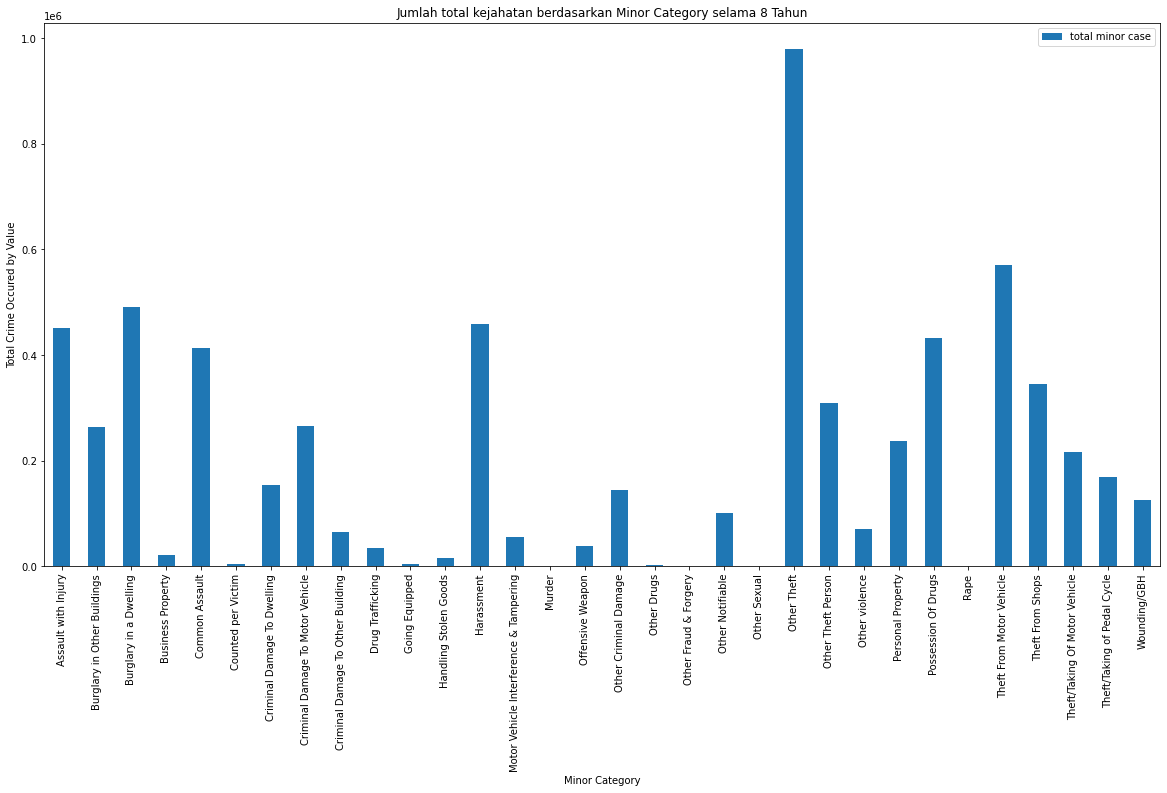

In [12]:
# df_monthlyMinorCases = df_monthlyMinorCases.T
df_TotalMinorCases["total minor case"] = df_monthlyMinorCases.T.sum(axis=1)
# df_monthlyMinorCases = df_monthlyMinorCases.T
df_TotalMinorCases.drop("total", axis=0, inplace=True)
df_TotalMinorCases.plot(title="Jumlah total kejahatan berdasarkan Minor Category selama 8 Tahun", kind="bar", xlabel="Minor Category", ylabel="Total Crime Occured by Value", legend=True, figsize=(20,10))

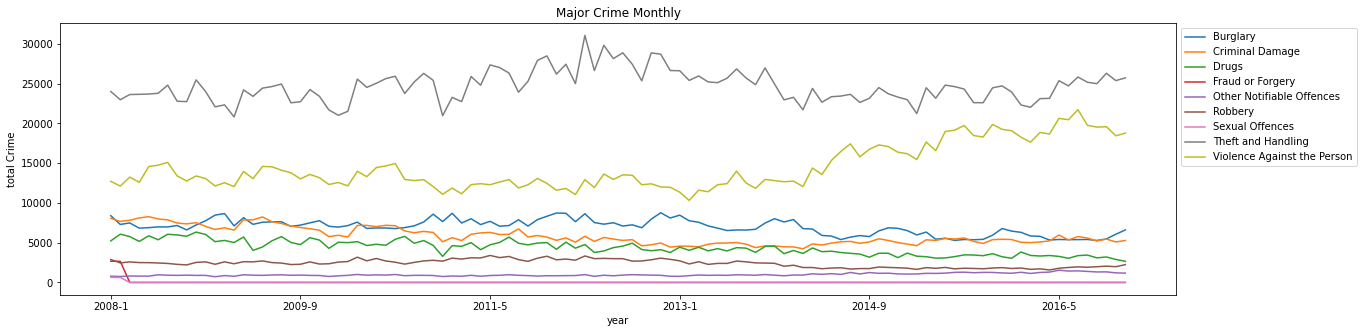

In [13]:
for i in major_categories:
    df_monthlyMajorCases[i].plot(title="Major Crime Monthly", kind="line", xlabel="year", ylabel="total Crime", legend=True, figsize=(20,5))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

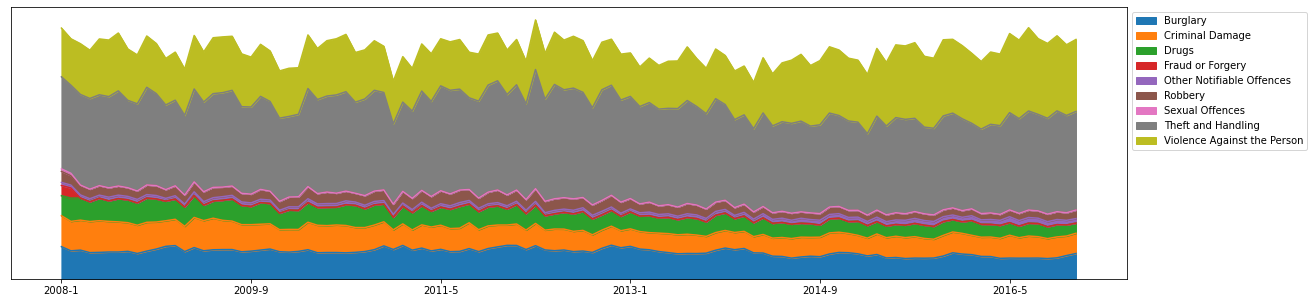

In [83]:
# df_monthlyMajorCases
df_monthlyMajorCases.plot(kind="area", figsize=(20,5), yticks=[])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [15]:
# df_monthlyMinorCases['total'].plot(title="Common Assault crime Monthly", kind="bar", xlabel="year", ylabel="total Crime", legend=True, figsize=(20,10))

## <b> Theft And Handling Analisys</b>

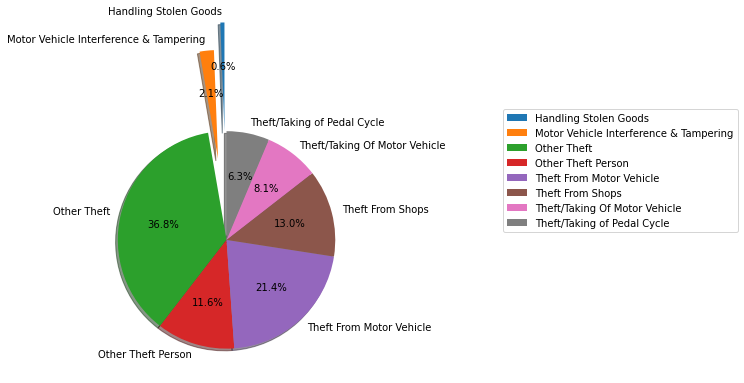

In [44]:
#get the total theft and handling case from 2008 - 2016
df_theftAndHandling = londonDataFrame[londonDataFrame["major_category"] == "Theft and Handling"]
theftAndHandling_total = df_theftAndHandling.loc[:, "value"].sum() #2661861 Cases
srs_theftAndHandling = df_theftAndHandling.groupby("minor_category")["value"].sum()
srs_theftAndHandling.plot(kind="pie", autopct="%.1f%%",legend=True, startangle=90, shadow=True, explode=[1,0.75,0,0,0,0,0,0], ylabel="", rot=45, figsize=(20,5))
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

## <b>Violence Againts the Person</b>

In [47]:
major_categories

Index(['Burglary', 'Criminal Damage', 'Drugs', 'Fraud or Forgery',
       'Other Notifiable Offences', 'Robbery', 'Sexual Offences',
       'Theft and Handling', 'Violence Against the Person'],
      dtype='object', name='major_category')

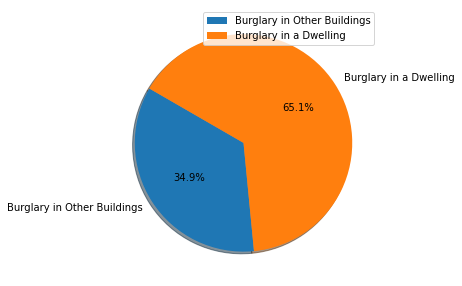

In [76]:
#get the total theft and handling case from 2008 - 2016
df_burglary = londonDataFrame[londonDataFrame["major_category"] == "Burglary"]
burglary_total = df_burglary.loc[:, "value"].sum() #754293 Cases
srs_burglary = df_burglary.groupby("minor_category")["value"].sum()
srs_burglary.plot(kind="pie", autopct="%.1f%%",legend=True, startangle=150, shadow=True, ylabel="", rot=45, figsize=(20,5))
# plt.legend(bbox_to_anchor=(0.2, 1.0))
plt.show()

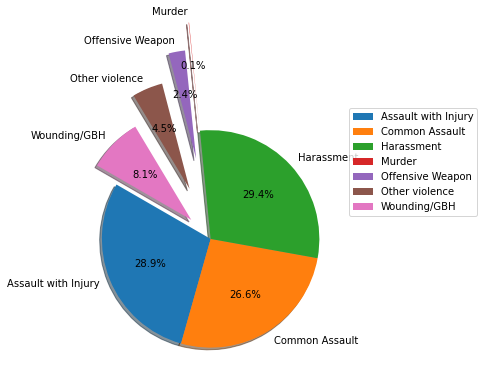

Index(['Assault with Injury', 'Common Assault', 'Harassment', 'Murder',
       'Offensive Weapon', 'Other violence', 'Wounding/GBH'],
      dtype='object', name='minor_category')

In [61]:
#get the total theft and handling case from 2008 - 2016
df_theftAndHandling = londonDataFrame[londonDataFrame["major_category"] == "Violence Against the Person"]
theftAndHandling_total = df_theftAndHandling.loc[:, "value"].sum() #2661861 Cases
srs_theftAndHandling = df_theftAndHandling.groupby("minor_category")["value"].sum()
srs_theftAndHandling.plot(kind="pie", autopct="%.1f%%",legend=True, startangle=150, explode=[0,0,0,1,0.75,0.5,0.25], shadow=True, ylabel="", rot=45, figsize=(20,5))
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()
srs_theftAndHandling.index

<AxesSubplot:xlabel='minor_category'>

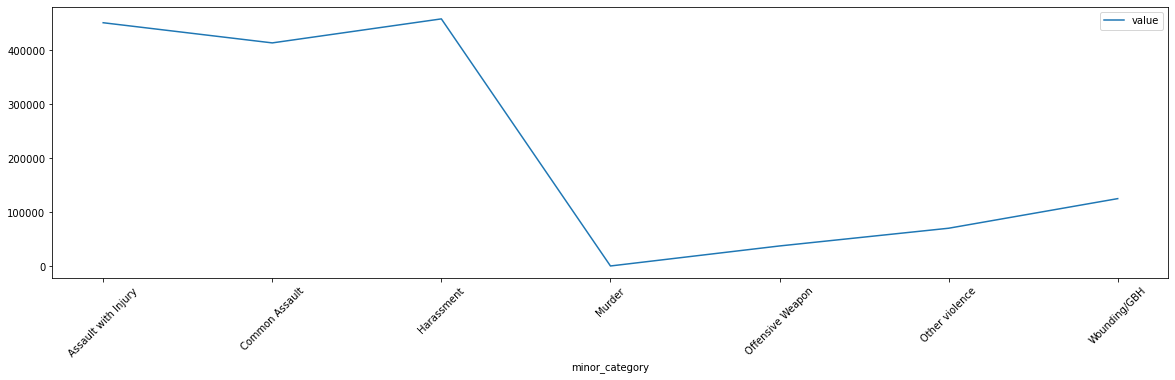

In [67]:
srs_theftAndHandling.plot(kind="line",legend=True, ylabel="", rot=45, figsize=(20,5))
